In [3]:
import pandas as pd

df =  pd.read_csv('netflix_titles.csv.zip')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [7]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [8]:
df['release_year'].value_counts().head(10)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


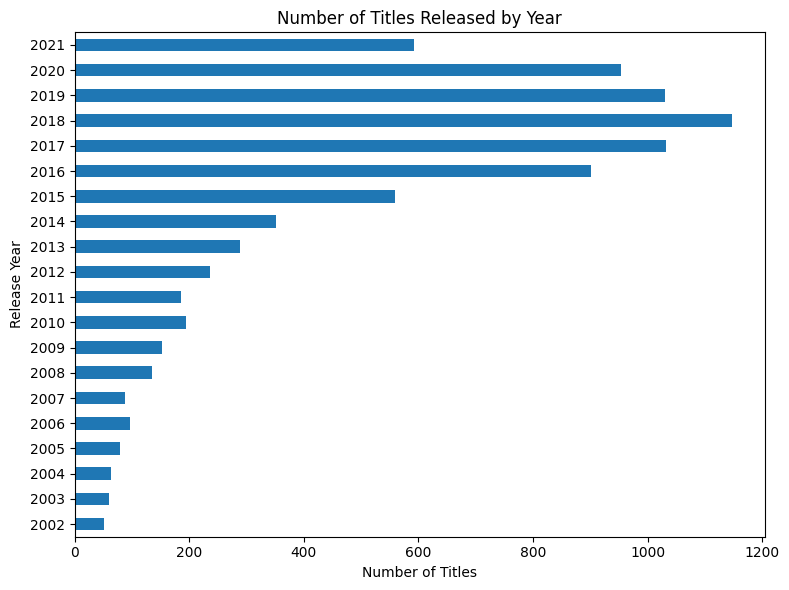

In [10]:
import matplotlib.pyplot as plt

df['release_year'].value_counts().head(20).sort_index().plot(kind='barh', figsize=(8,6))
plt.title("Number of Titles Released by Year")
plt.xlabel("Number of Titles")
plt.ylabel("Release Year")
plt.tight_layout()
plt.show()

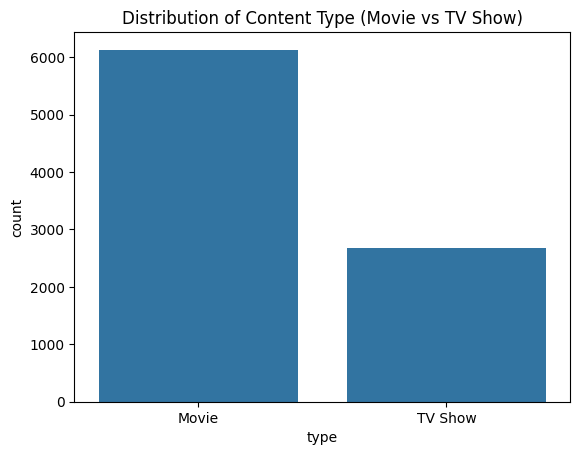

In [11]:
import seaborn as sns

sns.countplot(x='type', data=df)
plt.title("Distribution of Content Type (Movie vs TV Show)")
plt.show()

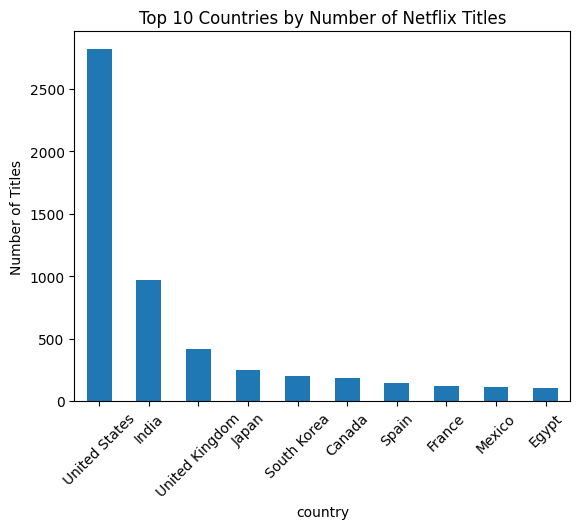

In [12]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

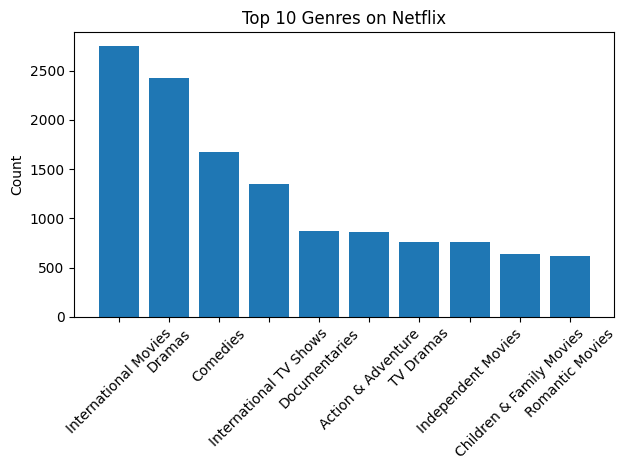

In [13]:
from collections import Counter

genre_list = []
for genre in df['listed_in'].dropna():
    genre_list.extend([g.strip() for g in genre.split(',')])

genre_counts = Counter(genre_list)
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.bar(genre_counts.keys(), genre_counts.values())
plt.title("Top 10 Genres on Netflix")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()